# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [272]:
# Dependencies
import pandas as pd
import numpy as np
from citipy import citipy
from random import uniform
from scipy import stats as st
import matplotlib.pyplot as plt
import requests
import json
from pathlib import Path

# Import API keys
from api_keys import (weather_api_key, g_key)

## Function Block

In [273]:
def randLatLong():
    Lat = uniform(-90,90)
    Lng = uniform(-180,180)
    return Lat, Lng

## Generate Cities List

In [274]:
numCities = 750
cityList = []
for x in range(numCities):
    cityList.append(randLatLong())

cityName = []
cityCountry = []
for city in cityList:
    lat = city[0]
    lng = city[1]
    city = citipy.nearest_city(lat, lng)
    cityName.append(city.city_name)
    cityCountry.append(city.country_code)
city_df = pd.DataFrame(data = cityList)
city_df['CityName'] = cityName
city_df['CountryCode'] = cityCountry
city_df.columns = ['Lat Guess', 'Long Guess', 'CityName','CountryCode']
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Lat Real'] = ''
city_df['Long Real'] = ''
city_df.head()

,Lat Guess,Long Guess,CityName,CountryCode,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real
0,55.427400,-142.517757,haines junction,ca,,,,,,
1,23.500256,19.105836,faya,td,,,,,,
2,-72.647598,-21.423490,mar del plata,ar,,,,,,
3,37.637939,61.673646,murgab,tm,,,,,,
4,-10.865536,-76.883998,oyon,pe,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [275]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [276]:
# Outputting sample query to be able to look at json format
qry = query_url + city_df['CityName'][0] + ',' + city_df['CountryCode'][0]
print(qry)

http://api.openweathermap.org/data/2.5/weather?appid=30f405648767c0f1706e75e615852de5&units=imperial&q=haines junction,ca


In [277]:
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
for index,row in city_df.iterrows():
    print(f'Working on City Number {index}: {row[2]}, {row[3]}')
    try:
        response = requests.get(query_url + row[2] + ',' + row[3]).json()
        city_df['Lat Real'][index] = response['coord']['lat']
        city_df['Long Real'][index] = response['coord']['lon']
        city_df['Temperature'][index] = response['main']['temp_max']
        city_df['Humidity'][index] = response['main']['humidity']
        city_df['Cloudiness'][index] = response['clouds']['all']
        city_df['Wind Speed'][index] = response['wind']['speed']
    except:
        city_df['Lat Real'][index] = np.nan
        city_df['Long Real'][index] = np.nan
        city_df['Temperature'][index] = np.nan
        city_df['Humidity'][index] = np.nan
        city_df['Cloudiness'][index] = np.nan
        city_df['Wind Speed'][index] = np.nan  
        print('')
        print(f'City Number is missing data')
        print('')

Working on City Number 0: haines junction, ca

City Number is missing data

Working on City Number 1: faya, td

City Number is missing data

Working on City Number 2: mar del plata, ar

City Number is missing data

Working on City Number 3: murgab, tm


<ipython-input-277-cbf8250bdb39>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Lat Real'][index] = np.nan
<ipython-input-277-cbf8250bdb39>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Long Real'][index] = np.nan
<ipython-input-277-cbf8250bdb39>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Temperature'][index] = np.nan
<ipython-input-277-cbf8250bdb39>:21: SettingWithCopyWarning: 
A value is tryin


City Number is missing data

Working on City Number 4: oyon, pe

City Number is missing data

Working on City Number 5: san patricio, mx

City Number is missing data

Working on City Number 6: thabazimbi, za

City Number is missing data

Working on City Number 7: cherskiy, ru

City Number is missing data

Working on City Number 8: cherskiy, ru

City Number is missing data

Working on City Number 9: mahebourg, mu

City Number is missing data

Working on City Number 10: hobart, au

City Number is missing data

Working on City Number 11: torbay, ca

City Number is missing data

Working on City Number 12: bambanglipuro, id

City Number is missing data

Working on City Number 13: lolua, tv

City Number is missing data

Working on City Number 14: esperance, au

City Number is missing data

Working on City Number 15: hobart, au

City Number is missing data

Working on City Number 16: behbahan, ir

City Number is missing data

Working on City Number 17: hermanus, za

City Number is missing da


City Number is missing data

Working on City Number 121: lompoc, us

City Number is missing data

Working on City Number 122: mataura, pf

City Number is missing data

Working on City Number 123: grand gaube, mu

City Number is missing data

Working on City Number 124: east london, za

City Number is missing data

Working on City Number 125: bluff, nz

City Number is missing data

Working on City Number 126: busselton, au

City Number is missing data

Working on City Number 127: baykit, ru

City Number is missing data

Working on City Number 128: vaini, to

City Number is missing data

Working on City Number 129: naliya, in

City Number is missing data

Working on City Number 130: ishigaki, jp

City Number is missing data

Working on City Number 131: kaitangata, nz

City Number is missing data

Working on City Number 132: ushuaia, ar

City Number is missing data

Working on City Number 133: punta arenas, cl

City Number is missing data

Working on City Number 134: coquimbo, cl

City N


City Number is missing data

Working on City Number 239: rikitea, pf

City Number is missing data

Working on City Number 240: isangel, vu

City Number is missing data

Working on City Number 241: bluff, nz

City Number is missing data

Working on City Number 242: cape town, za

City Number is missing data

Working on City Number 243: rikitea, pf

City Number is missing data

Working on City Number 244: georgetown, sh

City Number is missing data

Working on City Number 245: punta arenas, cl

City Number is missing data

Working on City Number 246: yellowknife, ca

City Number is missing data

Working on City Number 247: krasnoarmeyskiy, ru

City Number is missing data

Working on City Number 248: novikovo, ru

City Number is missing data

Working on City Number 249: jamestown, sh

City Number is missing data

Working on City Number 250: codrington, ag

City Number is missing data

Working on City Number 251: lima, pe

City Number is missing data

Working on City Number 252: longyearb


City Number is missing data

Working on City Number 354: rikitea, pf

City Number is missing data

Working on City Number 355: tuktoyaktuk, ca

City Number is missing data

Working on City Number 356: yellowknife, ca

City Number is missing data

Working on City Number 357: biankouma, ci

City Number is missing data

Working on City Number 358: da nang, vn

City Number is missing data

Working on City Number 359: hay river, ca

City Number is missing data

Working on City Number 360: krasnoselkup, ru

City Number is missing data

Working on City Number 361: te anau, nz

City Number is missing data

Working on City Number 362: punta arenas, cl

City Number is missing data

Working on City Number 363: hithadhoo, mv

City Number is missing data

Working on City Number 364: sadiqabad, pk

City Number is missing data

Working on City Number 365: nikolskoye, ru

City Number is missing data

Working on City Number 366: san andres, co

City Number is missing data

Working on City Number 367: 


City Number is missing data

Working on City Number 469: jamestown, sh

City Number is missing data

Working on City Number 470: bluff, nz

City Number is missing data

Working on City Number 471: sur, om

City Number is missing data

Working on City Number 472: te anau, nz

City Number is missing data

Working on City Number 473: los llanos de aridane, es

City Number is missing data

Working on City Number 474: richards bay, za

City Number is missing data

Working on City Number 475: georgetown, sh

City Number is missing data

Working on City Number 476: vaini, to

City Number is missing data

Working on City Number 477: chuy, uy

City Number is missing data

Working on City Number 478: khatanga, ru

City Number is missing data

Working on City Number 479: avarua, ck

City Number is missing data

Working on City Number 480: turayf, sa

City Number is missing data

Working on City Number 481: atuona, pf

City Number is missing data

Working on City Number 482: rikitea, pf

City Num


City Number is missing data

Working on City Number 587: clyde river, ca

City Number is missing data

Working on City Number 588: vaini, to

City Number is missing data

Working on City Number 589: tixkokob, mx

City Number is missing data

Working on City Number 590: cao bang, vn

City Number is missing data

Working on City Number 591: hilo, us

City Number is missing data

Working on City Number 592: nome, us

City Number is missing data

Working on City Number 593: ijaki, ki

City Number is missing data

Working on City Number 594: pinega, ru

City Number is missing data

Working on City Number 595: kailua, us

City Number is missing data

Working on City Number 596: taolanaro, mg

City Number is missing data

Working on City Number 597: darhan, mn

City Number is missing data

Working on City Number 598: gorlitz, de

City Number is missing data

Working on City Number 599: kavieng, pg

City Number is missing data

Working on City Number 600: punta arenas, cl

City Number is miss


City Number is missing data

Working on City Number 704: saskylakh, ru

City Number is missing data

Working on City Number 705: sarmizegetusa, ro

City Number is missing data

Working on City Number 706: butaritari, ki

City Number is missing data

Working on City Number 707: hualmay, pe

City Number is missing data

Working on City Number 708: san policarpo, ph

City Number is missing data

Working on City Number 709: castro, cl

City Number is missing data

Working on City Number 710: kaeo, nz

City Number is missing data

Working on City Number 711: bluff, nz

City Number is missing data

Working on City Number 712: imbituba, br

City Number is missing data

Working on City Number 713: leh, in

City Number is missing data

Working on City Number 714: la ronge, ca

City Number is missing data

Working on City Number 715: upernavik, gl

City Number is missing data

Working on City Number 716: cape town, za

City Number is missing data

Working on City Number 717: bluff, nz

City Num

In [278]:
cols = ['Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Lat Real', 'Long Real']
city_df[cols].replace('', 0, inplace=True)
city_df.dropna(how='any', inplace=True)
city_df.head(100)

C:\Users\Cam Foster\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Lat Guess,Long Guess,CityName,CountryCode,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [279]:
city_df[cols] = city_df[cols].astype(float)
city_df.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
printpath = Path.cwd() / 'cities.csv'
city_df.to_csv(printpath)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [281]:
#  Get the indices of cities that have humidity over 100%.


In [282]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

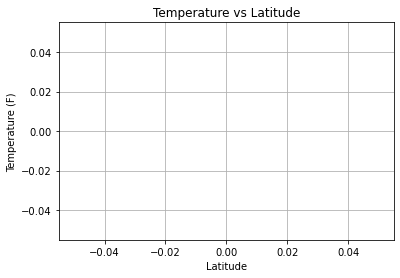

In [283]:
scat1 = plt.scatter(city_df['Lat Real'], city_df['Temperature'])
scat1 = plt.xlabel('Latitude')
scat1 = plt.ylabel('Temperature (F)')
scat1 = plt.title("Temperature vs Latitude")
scat1 = plt.grid(True)
plt.savefig("Temperature Vs Latitude.png")

## Latitude vs. Humidity Plot

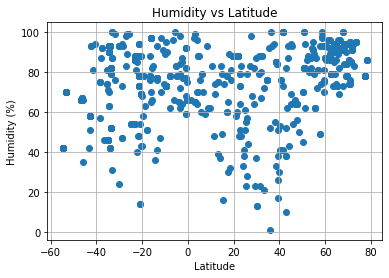

In [226]:
scat2 = plt.scatter(city_df['Lat Real'], city_df['Humidity'])
scat2 = plt.xlabel('Latitude')
scat2 = plt.ylabel('Humidity (%)')
scat2 = plt.title("Humidity vs Latitude")
scat2 = plt.grid(True)
plt.savefig("Humidity Vs Latitude.png")

## Latitude vs. Cloudiness Plot

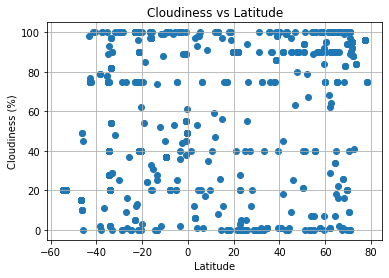

In [227]:
scat3 = plt.scatter(city_df['Lat Real'], city_df['Cloudiness'])
scat3 = plt.xlabel('Latitude')
scat3 = plt.ylabel('Cloudiness (%)')
scat3 = plt.title("Cloudiness vs Latitude")
scat3 = plt.grid(True)
plt.savefig("Cloudiness Vs Latitude.png")

## Latitude vs. Wind Speed Plot

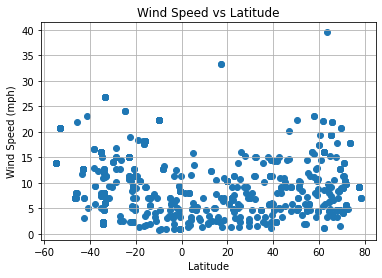

In [228]:
scat4 = plt.scatter(city_df['Lat Real'], city_df['Wind Speed'])
scat4 = plt.xlabel('Latitude')
scat4 = plt.ylabel('Wind Speed (mph)')
scat4 = plt.title("Wind Speed vs Latitude")
scat4 = plt.grid(True)
plt.savefig("Wind Speed Vs Latitude.png")

## Linear Regression

In [229]:
northCities = city_df.loc[city_df['Lat Real'] > 0]
southCities = city_df.loc[city_df['Lat Real'] < 0]

In [249]:
northCities.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,47.022595,-1.291194,46.290453,75.640777,59.025890,8.867152,45.366764,-0.501294
std,25.516781,103.006181,25.941843,19.661843,39.954349,5.743335,21.963500,99.694169
min,-5.416051,-179.385519,-2.790000,1.000000,0.000000,1.120000,1.330000,-179.170000
25%,25.574661,-97.160290,24.890000,67.000000,12.000000,4.700000,25.520000,-89.320000
50%,46.638683,10.058609,46.000000,79.000000,79.000000,7.940000,48.400000,11.240000
75%,68.871745,89.057345,73.090000,89.000000,94.000000,11.410000,65.280000,86.150000
max,89.984712,172.684176,89.600000,100.000000,100.000000,39.530000,78.220000,172.980000


In [250]:
southCities.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,-42.053179,6.992903,67.223404,71.716867,51.945783,10.726807,-27.503193,8.727319
std,26.528336,105.117428,12.330591,17.836399,33.531201,6.181339,15.399100,105.449694
min,-89.595067,-178.049253,41.000000,14.000000,0.000000,0.760000,-54.800000,-175.200000
25%,-64.275096,-82.203522,59.000000,58.000000,20.000000,5.990000,-35.045000,-70.920000
50%,-40.103205,7.248775,69.800000,73.000000,44.500000,9.420000,-26.985000,18.420000
75%,-18.834465,99.021319,77.000000,86.000000,82.000000,14.990000,-16.480000,115.330000
max,7.834723,177.363484,95.000000,100.000000,100.000000,26.750000,-0.450000,175.520000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8382


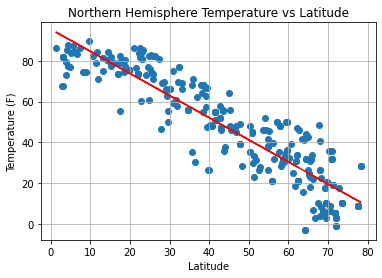

In [260]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Temperature'])
print(f'The r-value is {rvalue**2:0.4f}')
scat5 = plt.scatter(northCities['Lat Real'], northCities['Temperature'])
scat5 = plt.xlabel('Latitude')
scat5 = plt.ylabel('Temperature (F)')
scat5 = plt.title("Northern Hemisphere Temperature vs Latitude")
scat5 = plt.grid(True)
lineq5 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq5, color='red')
plt.savefig("Northern Hemisphere Temperature Vs Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7879


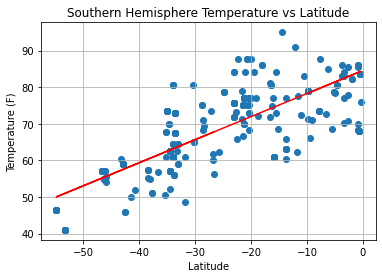

In [262]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Temperature'])
print(f'The r-value is {rvalue:0.4f}')
scat6 = plt.scatter(southCities['Lat Real'], southCities['Temperature'])
scat6 = plt.xlabel('Latitude')
scat6 = plt.ylabel('Temperature (F)')
scat6 = plt.title("Southern Hemisphere Temperature vs Latitude")
scat6 = plt.grid(True)
lineq6 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq5, color='red')
plt.savefig("Southern Hemisphere Temperature Vs Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3599


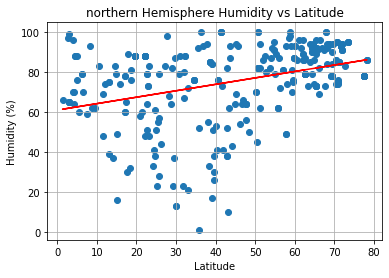

In [265]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Humidity'])
print(f'The r-value is {rvalue:0.4f}')
scat7 = plt.scatter(northCities['Lat Real'], northCities['Humidity'])
scat7 = plt.xlabel('Latitude')
scat7 = plt.ylabel('Humidity (%)')
scat7 = plt.title("Northern Hemisphere Humidity vs Latitude")
scat7 = plt.grid(True)
lineq7 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq7, color='red')
plt.savefig("Northern Hemisphere Humidity Vs Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3298


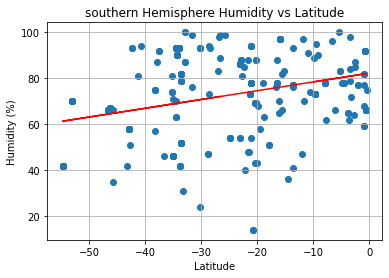

In [267]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Humidity'])
print(f'The r-value is {rvalue:0.4f}')
scat8 = plt.scatter(southCities['Lat Real'], southCities['Humidity'])
scat8 = plt.xlabel('Latitude')
scat8 = plt.ylabel('Humidity (%)')
scat8 = plt.title("Southern Hemisphere Humidity vs Latitude")
scat8 = plt.grid(True)
lineq8 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq8, color='red')
plt.savefig("Southern Hemisphere Humidity Vs Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2681


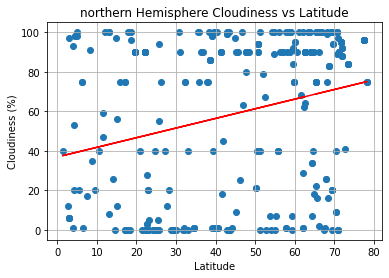

In [268]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Cloudiness'])
print(f'The r-value is {rvalue:0.4f}')
scat9 = plt.scatter(northCities['Lat Real'], northCities['Cloudiness'])
scat9 = plt.xlabel('Latitude')
scat9 = plt.ylabel('Cloudiness (%)')
scat9 = plt.title("Northern Hemisphere Cloudiness vs Latitude")
scat9 = plt.grid(True)
lineq9 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq9, color='red')
plt.savefig("Northern Hemisphere Cloudiness Vs Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2510


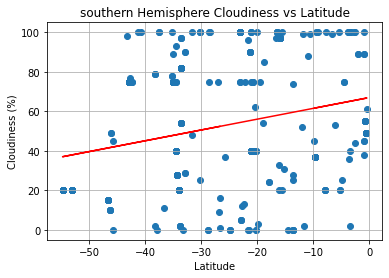

In [269]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Cloudiness'])
print(f'The r-value is {rvalue:0.4f}')
scat10 = plt.scatter(southCities['Lat Real'], southCities['Cloudiness'])
scat10 = plt.xlabel('Latitude')
scat10 = plt.ylabel('Cloudiness (%)')
scat10 = plt.title("Southern Hemisphere Cloudiness vs Latitude")
scat10 = plt.grid(True)
lineq10 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq10, color='red')
plt.savefig("Southern Hemisphere Cloudiness Vs Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.2491


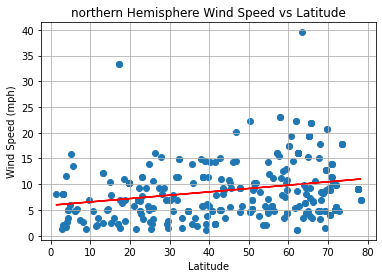

In [270]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Wind Speed'])
print(f'The r-value is {rvalue:0.4f}')
scat11 = plt.scatter(northCities['Lat Real'], northCities['Wind Speed'])
scat11 = plt.xlabel('Latitude')
scat11 = plt.ylabel('Wind Speed (mph)')
scat11 = plt.title("northern Hemisphere Wind Speed vs Latitude")
scat11 = plt.grid(True)
lineq11 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq11, color='red')
plt.savefig("Northern Hemisphere Wind Speed Vs Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3135


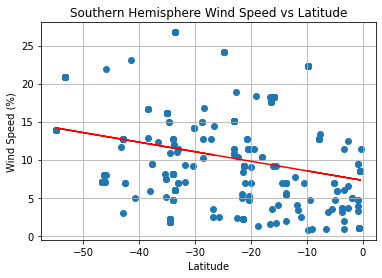

In [271]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Wind Speed'])
print(f'The r-value is {rvalue:0.4f}')
scat9 = plt.scatter(southCities['Lat Real'], southCities['Wind Speed'])
scat9 = plt.xlabel('Latitude')
scat9 = plt.ylabel('Wind Speed (%)')
scat9 = plt.title("Southern Hemisphere Wind Speed vs Latitude")
scat9 = plt.grid(True)
lineq9 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq9, color='red')
plt.savefig("Southern Hemisphere Wind Speed Vs Latitude.png")